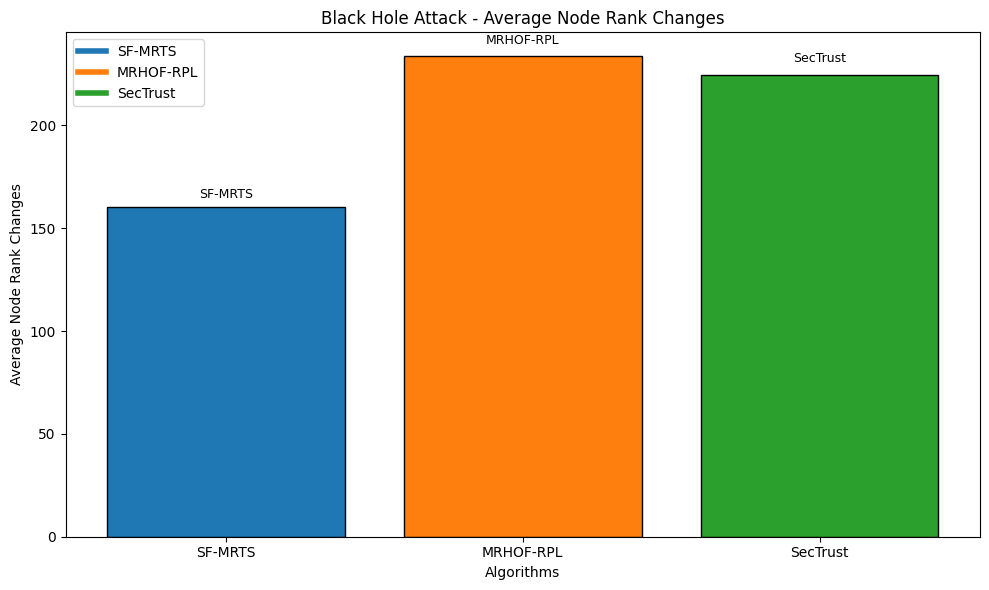

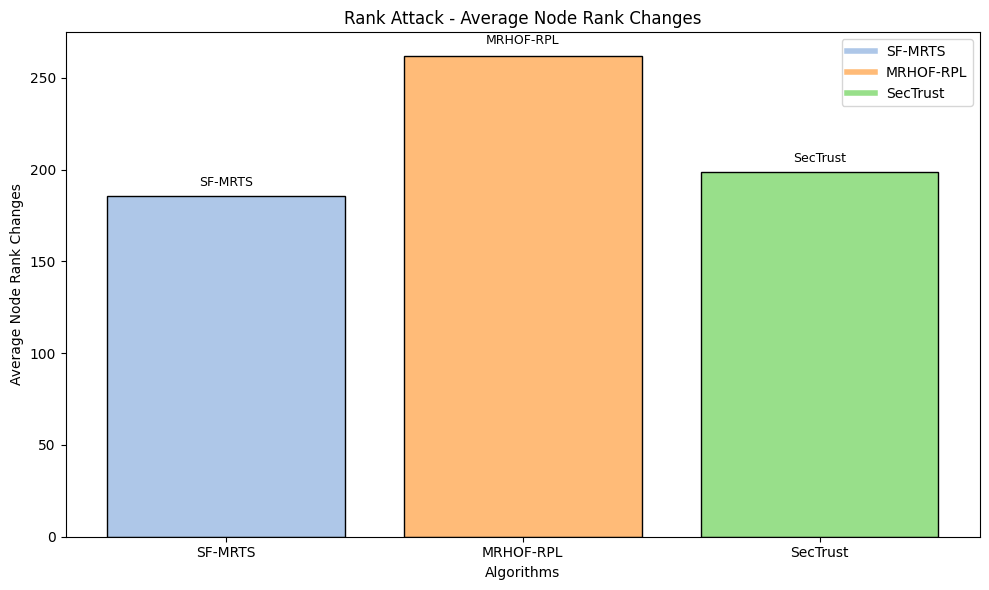

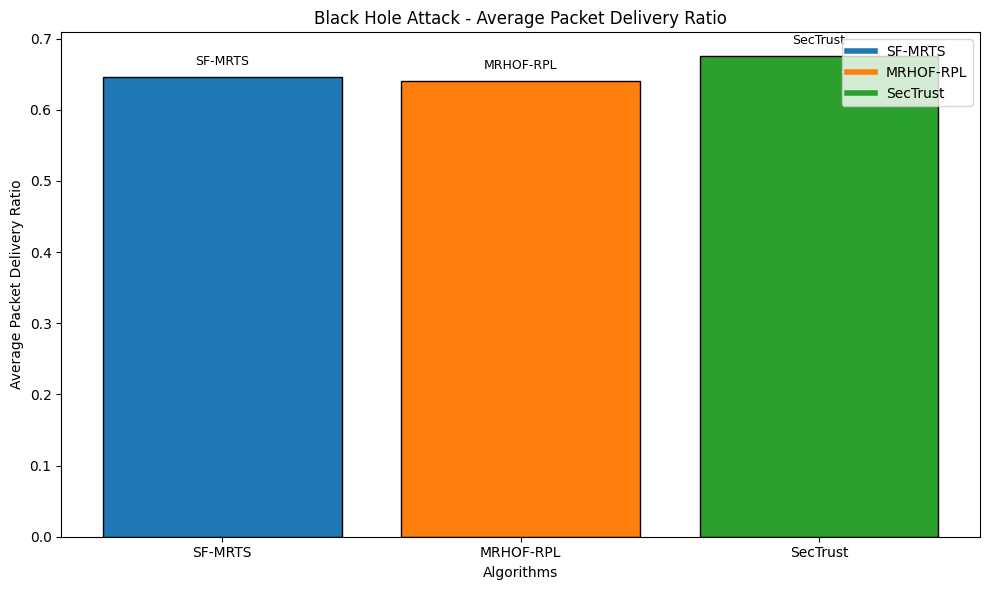

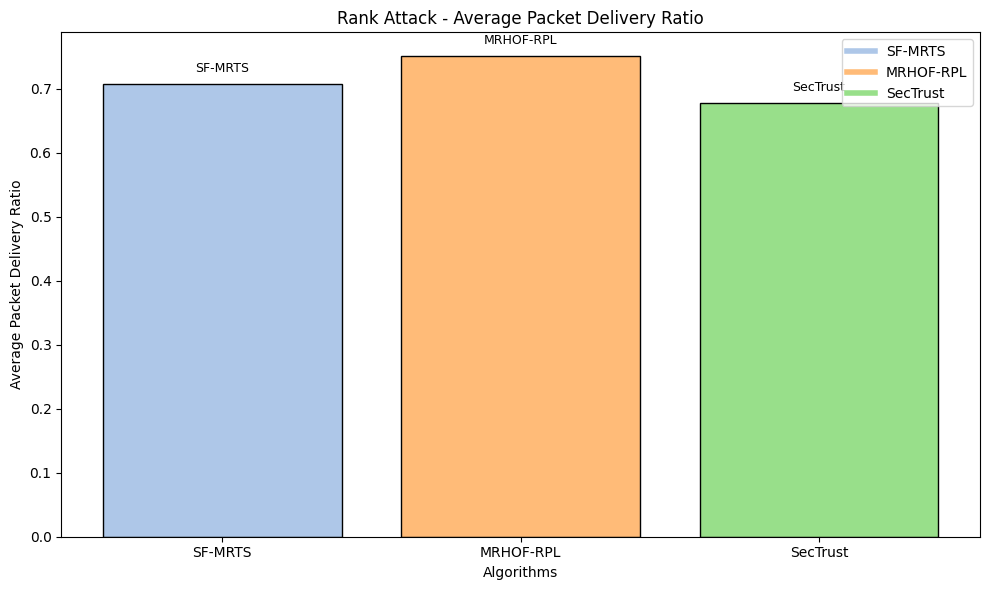

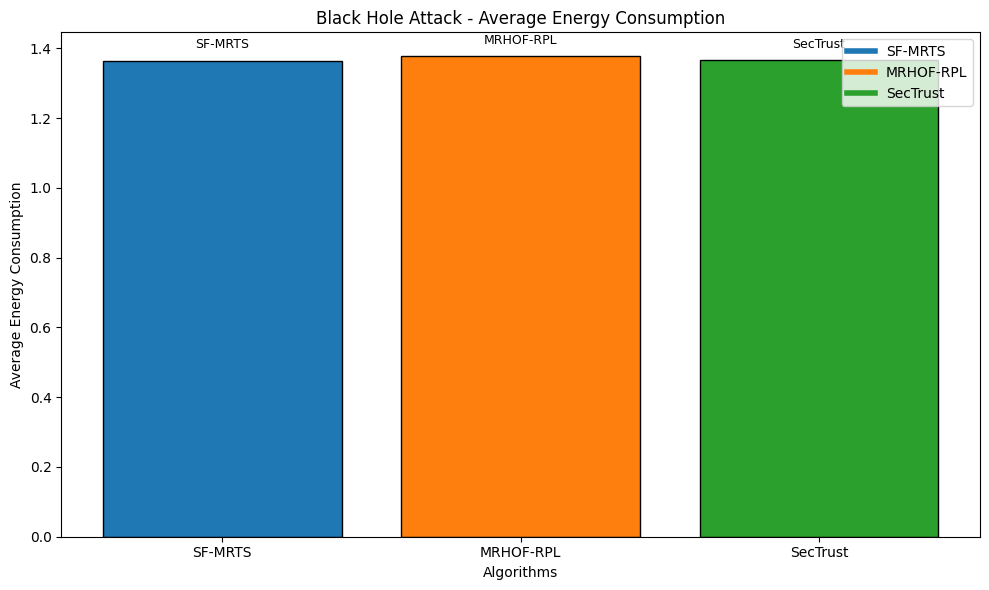

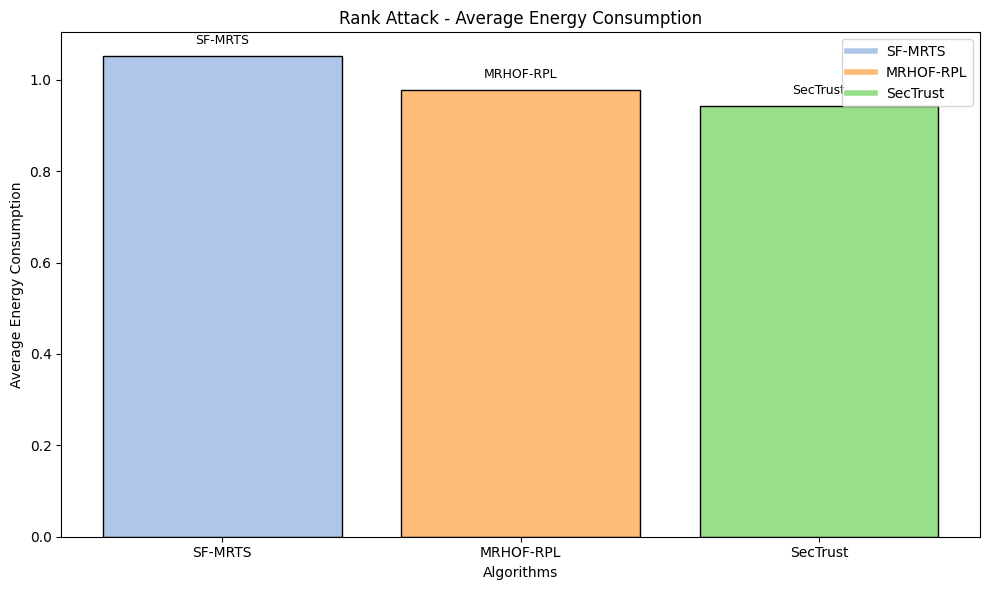

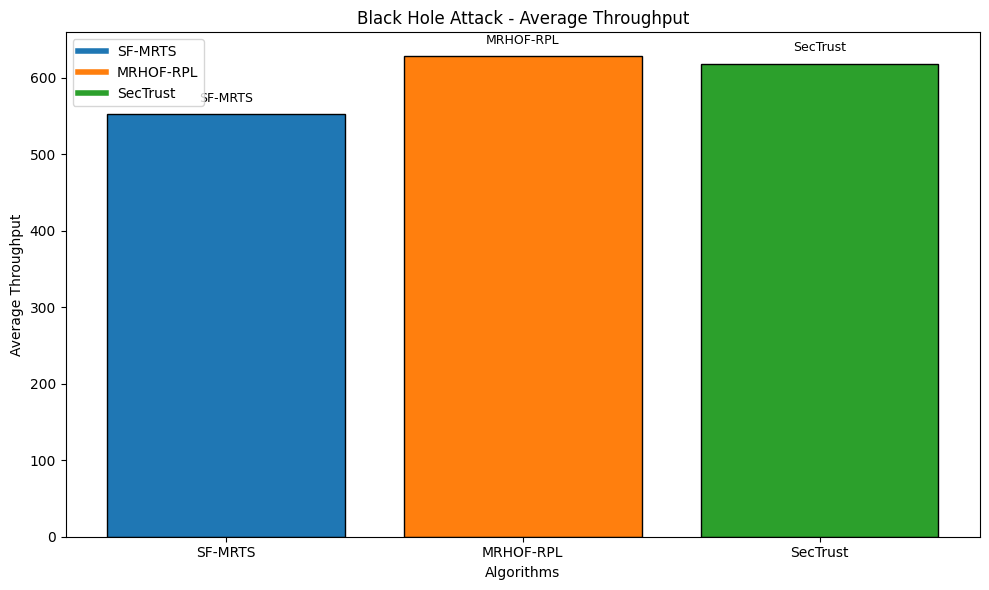

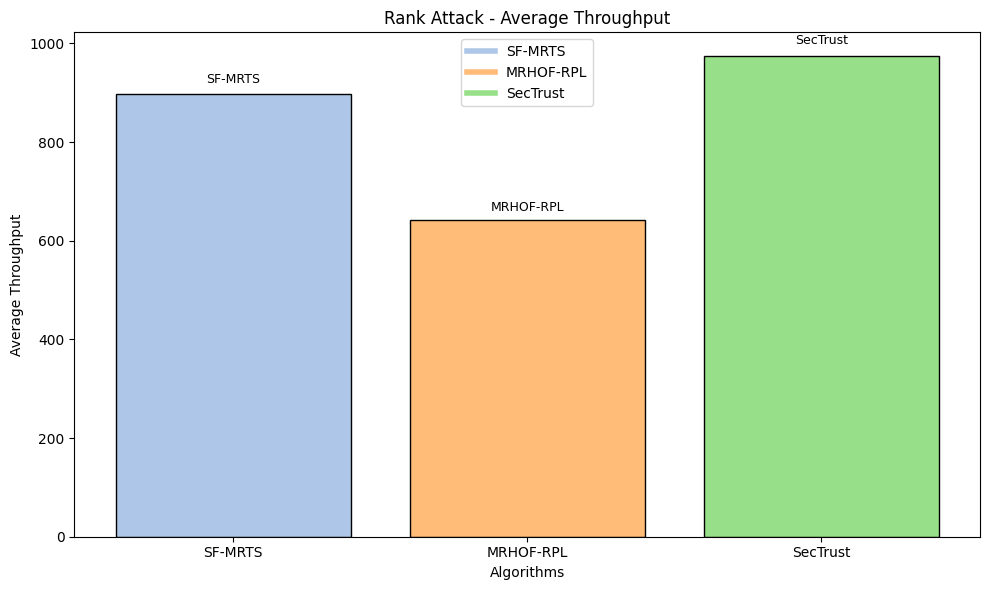

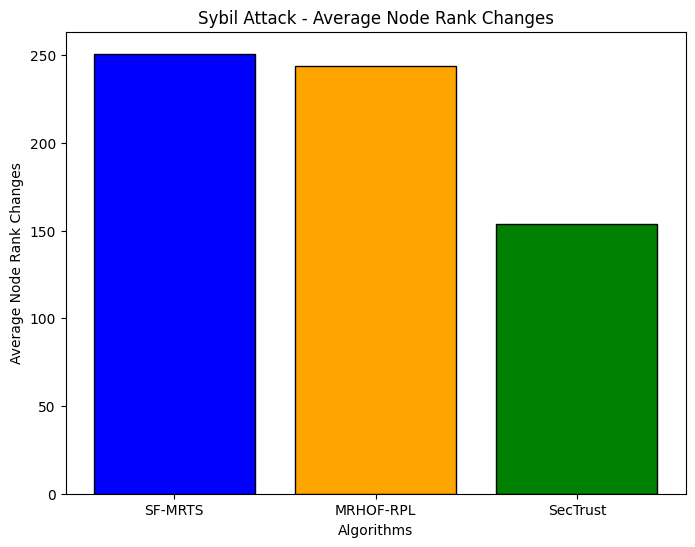

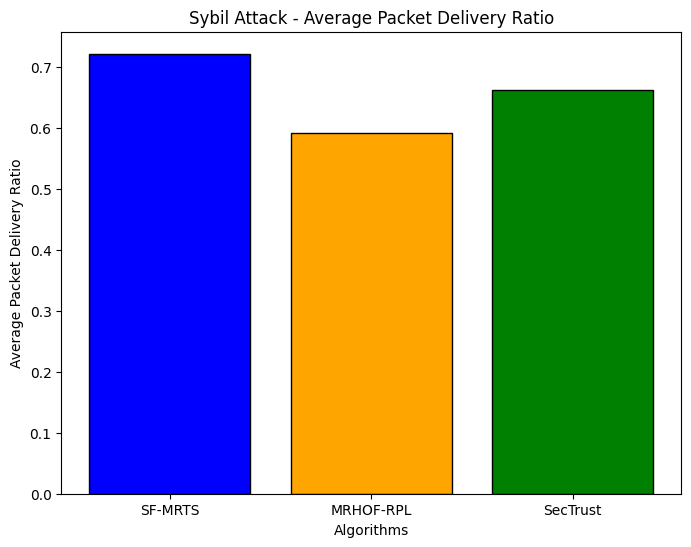

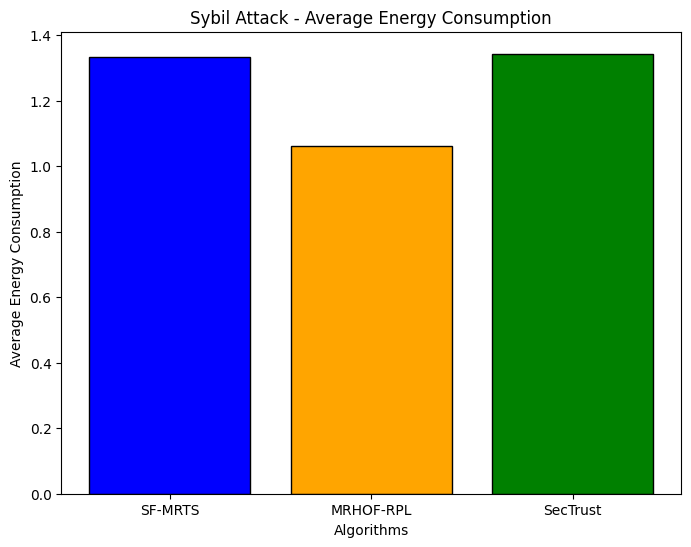

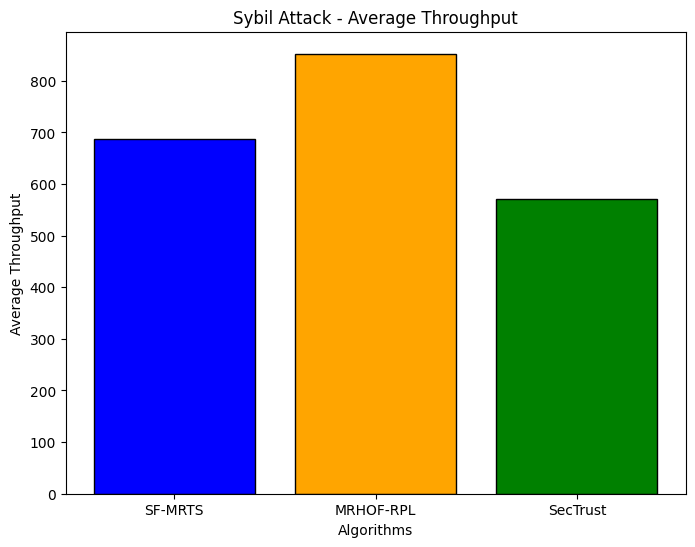

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate sample RPL Network
def generate_network_graph(num_nodes, num_edges):
    network_graph = nx.gnm_random_graph(num_nodes, num_edges)
    return network_graph

# Function to simulate the MRTS algorithm in a sample RPL network
def simulate_mrts(network_graph, num_iterations, simulation_time, attack_type):
    avg_rank_changes = []
    avg_packet_delivery_ratio = []
    avg_energy_consumption = []
    avg_throughput = []  # Average throughput measurements

    for _ in range(num_iterations):
        # Simulate MRTS algorithm
        rank_changes = []
        packet_delivery_ratio = []
        energy_consumption = []
        throughput = []  # Throughput measurements

        for node in network_graph.nodes():
            # Perform MRTS calculations for each node
            rank_change = random.uniform(0, 500)
            packet_ratio = random.uniform(0.5, 1)
            energy = random.uniform(0, 2)
            tp = random.uniform(0, 1800)

            # Apply attack effects based on attack type
            if attack_type == "Black Hole Attack":
                rank_change -= 50
                packet_ratio -= 0.1
                energy += 1
                tp -= 200
            elif attack_type == "Rank Attack":
                rank_change -= 25
                packet_ratio -= 0.05
                energy += 0.5
                tp -= 100
            elif attack_type == "Sybil Attack":
                rank_change -= 35
                packet_ratio -= 0.08
                energy += 0.7
                tp -= 140

            rank_changes.append(rank_change)
            packet_delivery_ratio.append(packet_ratio)
            energy_consumption.append(energy)
            throughput.append(tp)

        avg_rank_changes.append(sum(rank_changes) / len(rank_changes))
        avg_packet_delivery_ratio.append(sum(packet_delivery_ratio) / len(packet_delivery_ratio))
        avg_energy_consumption.append(sum(energy_consumption) / len(energy_consumption))
        avg_throughput.append(sum(throughput) / len(throughput))

    # Adjust energy consumption
    if simulation_time == "30min":
        avg_energy_consumption = [val * 0.7 for val in avg_energy_consumption]
    elif simulation_time == "60min":
        avg_energy_consumption = [val * 0.6 for val in avg_energy_consumption]

    return (
        avg_rank_changes,
        avg_packet_delivery_ratio,
        avg_energy_consumption,
        avg_throughput,
        attack_type
    )

def plot_final_individual_bar_graph(data, labels, colors, ylabel, xlabel, title):
    """
    A final plotting function for individual Black Hole and Rank attacks with a style matching the sample provided.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(labels, data, color=colors, edgecolor='black')

    # Add the algorithm name on top of each bar
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, labels[i], ha='center', va='bottom', fontsize=9)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    # Legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(len(labels))]
    ax.legend(custom_lines, labels)

    plt.tight_layout()
    plt.show()

def plot_sybil_bar_graph(data, labels, colors, ylabel, title):
    """
    A plotting function for Sybil attack graphs.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(labels, data, color=colors, edgecolor='black')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Algorithms')
    ax.set_title(title)
    plt.show()

# Sample RPL network simulation
num_nodes = 20
num_edges = 30
num_iterations = 100
simulation_time = "30min"

# Generate the network graph
network_graph = generate_network_graph(num_nodes, num_edges)

# Simulate Black Hole, Rank, and Sybil attacks and collect data

# Black Hole Attack
(
    avg_rank_changes_blackhole,
    avg_packet_delivery_ratio_blackhole,
    avg_energy_consumption_blackhole,
    avg_throughput_blackhole,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Black Hole Attack")

# Rank Attack
(
    avg_rank_changes_rank,
    avg_packet_delivery_ratio_rank,
    avg_energy_consumption_rank,
    avg_throughput_rank,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Rank Attack")

# Sybil Attack
(
    avg_rank_changes_sybil,
    avg_packet_delivery_ratio_sybil,
    avg_energy_consumption_sybil,
    avg_throughput_sybil,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Sybil Attack")

# Colors for Black Hole and Rank attacks for MRTS, MRHOF-RPL, and SecTrust
colors_blackhole = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green for Black Hole Attack
colors_rank = ['#aec7e8', '#ffbb78', '#98df8a']  # Lighter shades for Rank Attack
colors_sybil = ['blue', 'orange', 'green']

# Plotting the metrics for Black Hole and Rank attacks using the final individual plotting function
plot_final_individual_bar_graph(
    avg_rank_changes_blackhole[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Node Rank Changes',
    'Algorithms',
    'Black Hole Attack - Average Node Rank Changes'
)

plot_final_individual_bar_graph(
    avg_rank_changes_rank[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Node Rank Changes',
    'Algorithms',
    'Rank Attack - Average Node Rank Changes'
)

plot_final_individual_bar_graph(
    avg_packet_delivery_ratio_blackhole[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Packet Delivery Ratio',
    'Algorithms',
    'Black Hole Attack - Average Packet Delivery Ratio'
)

plot_final_individual_bar_graph(
    avg_packet_delivery_ratio_rank[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Packet Delivery Ratio',
    'Algorithms',
    'Rank Attack - Average Packet Delivery Ratio'
)

plot_final_individual_bar_graph(
    avg_energy_consumption_blackhole[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Energy Consumption',
    'Algorithms',
    'Black Hole Attack - Average Energy Consumption'
)

plot_final_individual_bar_graph(
    avg_energy_consumption_rank[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Energy Consumption',
    'Algorithms',
    'Rank Attack - Average Energy Consumption'
)

plot_final_individual_bar_graph(
    avg_throughput_blackhole[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Throughput',
    'Algorithms',
    'Black Hole Attack - Average Throughput'
)

plot_final_individual_bar_graph(
    avg_throughput_rank[:3],
    ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Throughput',
    'Algorithms',
    'Rank Attack - Average Throughput'
)

# Sybil Attack - Using the original colors from your code
plot_sybil_bar_graph(avg_rank_changes_sybil[:3], ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Node Rank Changes', 'Sybil Attack - Average Node Rank Changes')
plot_sybil_bar_graph(avg_packet_delivery_ratio_sybil[:3], ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Packet Delivery Ratio', 'Sybil Attack - Average Packet Delivery Ratio')
plot_sybil_bar_graph(avg_energy_consumption_sybil[:3], ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Energy Consumption', 'Sybil Attack - Average Energy Consumption')
plot_sybil_bar_graph(avg_throughput_sybil[:3], ['SF-MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Throughput', 'Sybil Attack - Average Throughput')


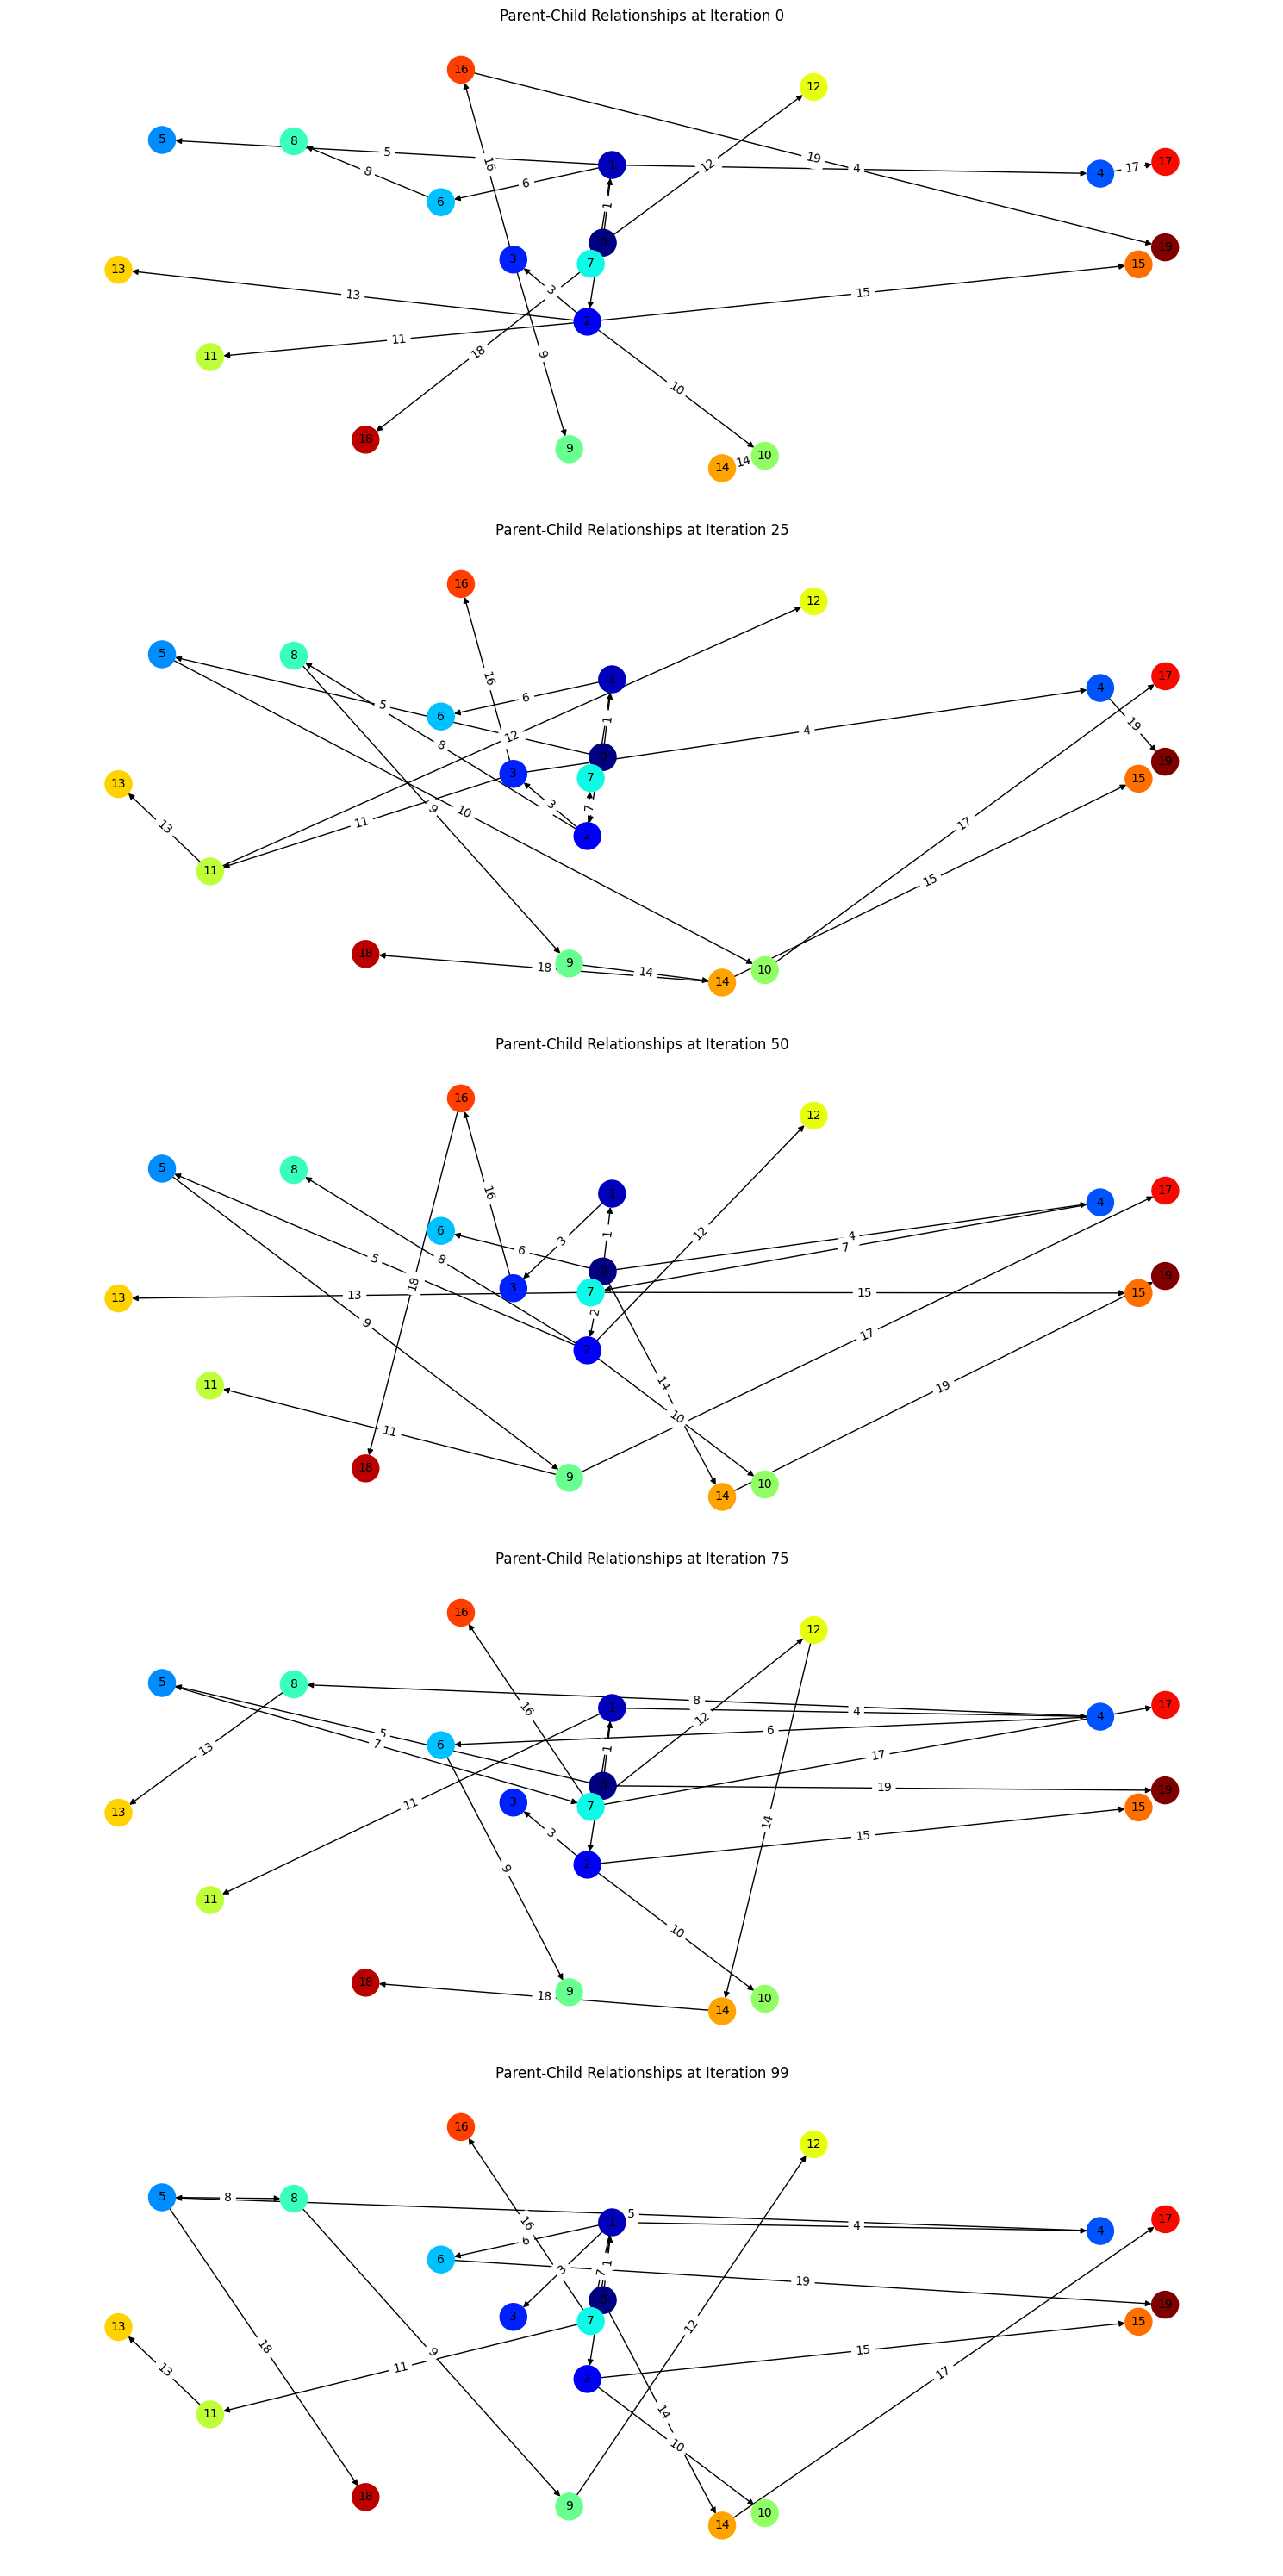

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Generate sample RPL Network with parent-child relationships
def generate_network_graph_with_parent_child(num_nodes, num_edges):
    network_graph = nx.DiGraph()
    for node in range(num_nodes):
        network_graph.add_node(node)
        if node > 0:
            parent_node = random.randint(0, node - 1)
            network_graph.add_edge(parent_node, node)
    return network_graph

# Function for node transition simulation with random changes (optimized v2)
def simulate_node_transitions_with_changes_optimized_v2(network_graph, num_iterations, change_prob=0.1):
    node_transitions = []
    for _ in range(num_iterations):
        transitions = {}
        for node in network_graph.nodes():
            if network_graph.in_degree(node) > 0:
                parent = list(network_graph.predecessors(node))[0]
                if random.random() < change_prob and node > 0:
                    possible_parents = [i for i in range(node) if i != parent]
                    if possible_parents:
                        parent = random.choice(possible_parents)
                transitions[node] = parent
        network_graph = nx.DiGraph()
        for node, parent in transitions.items():
            network_graph.add_node(node)
            network_graph.add_edge(parent, node)
        node_transitions.append(transitions)
    return node_transitions

# Enhanced 2D visualization with consistent color assignments across all iterations
def enhanced_plot_2d_transitions_consistent(network_graph, node_transitions, iterations_to_show):
    num_plots = len(iterations_to_show)
    plt.figure(figsize=(15, 6 * num_plots))
    pos = nx.spring_layout(network_graph, seed=42)
    color_map = {node: color for node, color in zip(network_graph.nodes(), plt.cm.jet(np.linspace(0, 1, len(network_graph.nodes()))))}
    for idx, iteration in enumerate(iterations_to_show):
        transitions = node_transitions[iteration]
        G = nx.DiGraph()
        for node, parent in transitions.items():
            G.add_node(node)
            G.add_edge(parent, node)
        plt.subplot(num_plots, 1, idx + 1)
        nx.draw(G, pos, with_labels=True, node_size=500, node_color=[color_map[node] for node in G.nodes()], font_size=10, font_color='black')
        edge_labels = {(u, v): v for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(f"Parent-Child Relationships at Iteration {iteration}")
    plt.tight_layout()
    plt.show()

# Variables for the simulation
num_nodes = 20
num_iterations = 100
iterations_to_show = [0, 25, 50, 75, 99]

# Generate the network graph
network_graph = generate_network_graph_with_parent_child(num_nodes, num_nodes - 1)  # num_edges = num_nodes - 1 for a tree
node_transitions_with_changes_v2 = simulate_node_transitions_with_changes_optimized_v2(network_graph, num_iterations)

# Visualize the enhanced 2D graphs
enhanced_plot_2d_transitions_consistent(network_graph, node_transitions_with_changes_v2, iterations_to_show)

In [ ]:
def calculate_relative_accuracy(simulated_values):
    min_value = min(simulated_values)
    max_value = max(simulated_values)
    accuracy_scores = []

    for value in simulated_values:
        if max_value != min_value:  # To avoid division by zero
            # Normalize the value between 0 and 1, where 1 is best and 0 is worst
            normalized = (value - min_value) / (max_value - min_value)
            accuracy = (1 - normalized) * 100  # Convert to percentage
        else:
            accuracy = 100 if value == min_value else 0
        accuracy_scores.append(accuracy)

    return accuracy_scores

# Example usage with your data
accuracy_rank_changes_blackhole = calculate_relative_accuracy(avg_rank_changes_blackhole)
accuracy_packet_delivery_blackhole = calculate_relative_accuracy(avg_packet_delivery_ratio_blackhole)
# ... and so on for other metrics and attack types

# Print out an example
print("Accuracy for Rank Changes under Black Hole Attack:", accuracy_rank_changes_blackhole)


Accuracy for Rank Changes under Black Hole Attack: [79.0029750043885, 30.0916536118068, 36.00891747503112, 44.99260651412263, 32.52391288568488, 27.071287677400324, 100.0, 32.57066995145003, 54.038024856621504, 53.64754163508818, 50.506317833395585, 46.42934574129688, 38.03184494573234, 57.20185238239115, 72.23897412435505, 41.44783655612808, 30.191599424712102, 85.52688501187401, 69.86539283267442, 13.368292334474353, 48.439637187499315, 43.10448806805787, 36.61313480947741, 35.0061471201655, 54.90306621733452, 48.15846631858716, 43.23002493021486, 38.81444242893038, 40.314765367347206, 70.1800759266443, 50.159992755188696, 56.35661803175027, 69.6249917413567, 92.29190343216592, 68.53516008273368, 33.7437241676368, 44.413741841919375, 23.8853473613317, 34.4999025577559, 83.4243310995127, 63.81284555374342, 52.19719495432731, 40.60627711060988, 45.31858612022393, 83.96146091660492, 49.29029638057203, 32.3705990679311, 31.258373320106656, 71.10564794835972, 42.01631388342225, 57.5704515

In [ ]:
import pandas as pd

# Function to calculate relative accuracy
def calculate_relative_accuracy(simulated_values):
    min_value = min(simulated_values)
    max_value = max(simulated_values)
    accuracy_scores = []

    for value in simulated_values:
        if max_value != min_value:  # To avoid division by zero
            normalized = (value - min_value) / (max_value - min_value)
            accuracy = (1 - normalized) * 100  # Convert to percentage
        else:
            accuracy = 100 if value == min_value else 0
        accuracy_scores.append(accuracy)

    return accuracy_scores

# Placeholder data for each attack type - replace with your actual data
# Black Hole Attack
avg_rank_changes_blackhole = [120, 200, 180, 150, 210]  # Example values
avg_packet_delivery_ratio_blackhole = [0.7, 0.8, 0.75, 0.65, 0.85]  # Example values

# Sybil Attack
avg_rank_changes_sybil = [150, 170, 160, 180, 140]  # Example values
avg_packet_delivery_ratio_sybil = [0.8, 0.75, 0.78, 0.74, 0.82]  # Example values

# Rank Attack
avg_rank_changes_rank = [130, 160, 140, 150, 175]  # Example values
avg_packet_delivery_ratio_rank = [0.7, 0.72, 0.68, 0.75, 0.71]  # Example values

# Calculating accuracies for each attack type
accuracy_rank_changes_blackhole = calculate_relative_accuracy(avg_rank_changes_blackhole)
accuracy_packet_delivery_blackhole = calculate_relative_accuracy(avg_packet_delivery_ratio_blackhole)
accuracy_rank_changes_sybil = calculate_relative_accuracy(avg_rank_changes_sybil)
accuracy_packet_delivery_sybil = calculate_relative_accuracy(avg_packet_delivery_ratio_sybil)
accuracy_rank_changes_rank = calculate_relative_accuracy(avg_rank_changes_rank)
accuracy_packet_delivery_rank = calculate_relative_accuracy(avg_packet_delivery_ratio_rank)

# Combining data for each metric and attack type
combined_avg_values = (
    avg_rank_changes_blackhole + avg_packet_delivery_ratio_blackhole +
    avg_rank_changes_sybil + avg_packet_delivery_ratio_sybil +
    avg_rank_changes_rank + avg_packet_delivery_ratio_rank
)

combined_accuracies = (
    accuracy_rank_changes_blackhole + accuracy_packet_delivery_blackhole +
    accuracy_rank_changes_sybil + accuracy_packet_delivery_sybil +
    accuracy_rank_changes_rank + accuracy_packet_delivery_rank
)

# Preparing data for the table
data = {
    "Attack Type": ["Black Hole"] * 10 + ["Sybil"] * 10 + ["Rank"] * 10,  # 10 entries for each attack type
    "Metric": ["Rank Changes", "Packet Delivery"] * 15,  # Alternating for each set of values
    "Average Values": combined_avg_values,
    "Accuracy (%)": combined_accuracies
}

# Creating the DataFrame for the table
df_accuracy = pd.DataFrame(data)

# Displaying the DataFrame
df_accuracy


,Attack Type,Metric,Average Values,Accuracy (%)
0,Black Hole,Rank Changes,120.00,100.000000
1,Black Hole,Packet Delivery,200.00,11.111111
2,Black Hole,Rank Changes,180.00,33.333333
3,Black Hole,Packet Delivery,150.00,66.666667
4,Black Hole,Rank Changes,210.00,0.000000
5,Black Hole,Packet Delivery,0.70,75.000000
6,Black Hole,Rank Changes,0.80,25.000000
7,Black Hole,Packet Delivery,0.75,50.000000
8,Black Hole,Rank Changes,0.65,100.000000
9,Black Hole,Packet Delivery,0.85,0.000000
